**Question 1**

A permutation perm of n + 1 integers of all the integers in the range [0, n] can be represented as a string s of length n where:

- s[i] == 'I' if perm[i] < perm[i + 1], and
- s[i] == 'D' if perm[i] > perm[i + 1].

Given a string s, reconstruct the permutation perm and return it. If there are multiple valid permutations perm, return **any of them**.

**Example 1:**

**Input:** s = "IDID"

**Output:**

[0,4,1,3,2]

In [1]:
from typing import List

class Solution:
    def diStringMatch(self, s: str) -> List[int]:
        left = right = 0
        res = [0]
        for i in s:
            if i == "I":
                right += 1
                res.append(right)
            else:
                left -= 1
                res.append(left)
                
        return [i - left for i in res]
    
    
solution = Solution()

s = 'IDID'
print(solution.diStringMatch(s))

[2, 3, 1, 4, 0]


**Question 2**

You are given an m x n integer matrix matrix with the following two properties:

- Each row is sorted in non-decreasing order.
- The first integer of each row is greater than the last integer of the previous row.

Given an integer target, return true *if* target *is in* matrix *or* false *otherwise*.

You must write a solution in O(log(m * n)) time complexity.

**Example 1:**
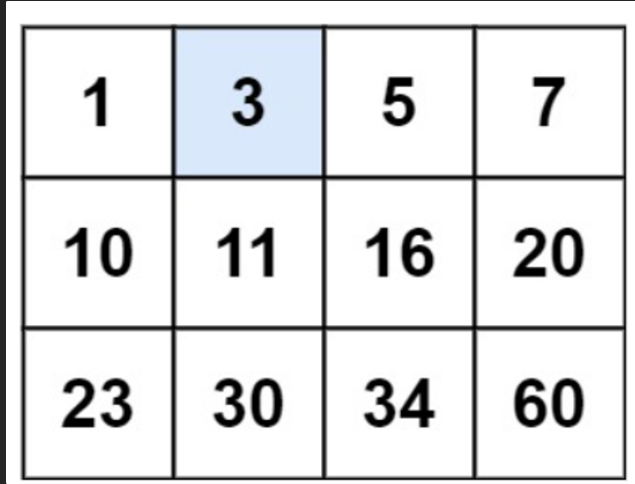

**Input:** matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

**Output:** true

In [2]:
def searchMatrix(matrix, target):
    m, n = len(matrix), len(matrix[0])
    left, right = 0, m * n - 1

    while left <= right:
        mid = left + (right - left) // 2
        row = mid // n
        col = mid % n

        if matrix[row][col] == target:
            return True
        elif matrix[row][col] < target:
            left = mid + 1
        else:
            right = mid - 1

    return False
matrix = [
    [1, 3, 5, 7],
    [10, 11, 16, 20],
    [23, 30, 34, 60]
]
target = 3

print(searchMatrix(matrix, target))

True


**Question 3**

Given an array of integers arr, return *true if and only if it is a valid mountain array*.

Recall that arr is a mountain array if and only if:

- arr.length >= 3
- There exists some i with 0 < i < arr.length - 1 such that:
    - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
    - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]
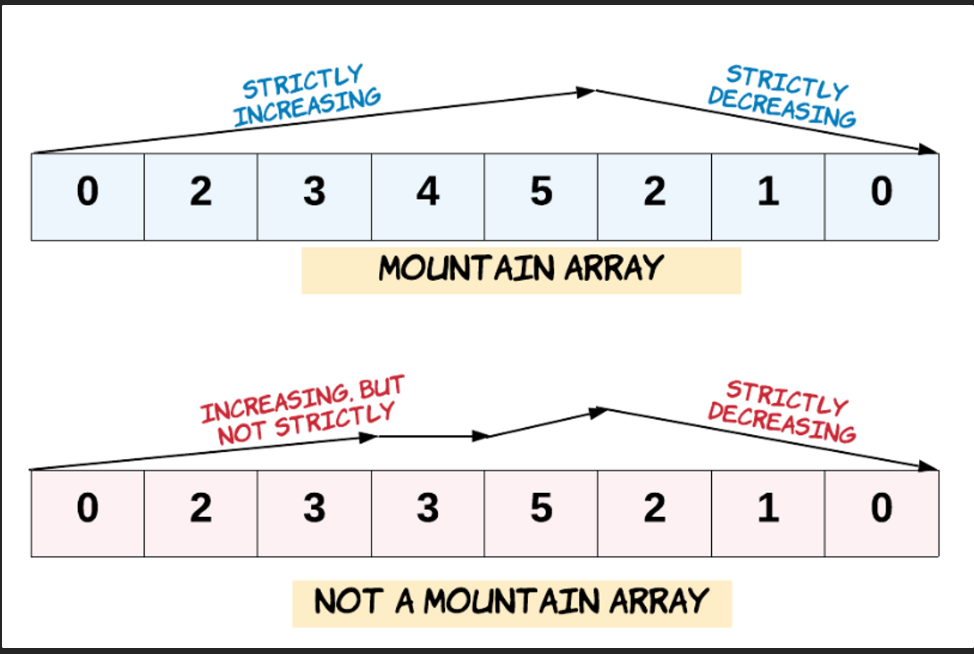
**Example 1:**

**Input:** arr = [2,1]

**Output:**

false

In [3]:
class Solution:
    def validMountainArray(self, arr: List[int]) -> bool:
        i, j, n = 0, len(arr) - 1, len(arr)
        while i + 1 < n and arr[i] < arr[i + 1]: 
            i += 1
        while j > 0 and arr[j - 1] > arr[j]: 
            j -= 1
        
        return 0 < i == j < n - 1
    
    
solution = Solution()

arr = [2, 1]
print(solution.validMountainArray(arr))

False


**Question 4**

Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.

**Example 1:**

**Input:** nums = [0,1]

**Output:** 2

**Explanation:**

[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.


In [4]:
class Solution:
    def findMaxLength(self, nums: List[int]) -> int:
        max_length =0
        hash={}
        count=0
        for i in range(len(nums)):
            current=nums[i]
            if current==0:
                count-=1 # decrement our count if our current element is 0
            else:
                # increment our count if current element is 1
             count+=1

            if count==0:
                # if count is 0, we have a new subarray with length+1
                max_length=i+1
            if count in hash:
                max_length=max(max_length,i-hash[count]) 
            else:
                hash[count]=i
        return max_length
    
    
solution = Solution()

nums = [0, 1]
print(solution.findMaxLength(nums))

2


**Question 5**

The **product sum** of two equal-length arrays a and b is equal to the sum of a[i] * b[i] for all 0 <= i < a.length (**0-indexed**).

- For example, if a = [1,2,3,4] and b = [5,2,3,1], the **product sum** would be 1*5 + 2*2 + 3*3 + 4*1 = 22.

Given two arrays nums1 and nums2 of length n, return *the **minimum product sum** if you are allowed to **rearrange** the **order** of the elements in* nums1.

**Example 1:**

**Input:** nums1 = [5,3,4,2], nums2 = [4,2,2,5]

**Output:** 40

**Explanation:**

We can rearrange nums1 to become [3,5,4,2]. The product sum of [3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.

In [5]:
def minValue(A, B, n):
    A.sort()
    B.sort()
 
    result = 0
    for i in range(n):
        result += (A[i] * B[n - i - 1])
 
    return result
 
 
A = [5,3,4,2]
B = [4,2,2,5]
n = len(A)
print(minValue(A, B, n))

40


**Question 6**

An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].

In [6]:
import collections

class Solution:
    def findOriginalArray(self, changed: List[int]) -> List[int]:
        c = collections.Counter(changed)
        if c[0] % 2:
            return []
        for x in sorted(c):
            if c[x] > c[2 * x]:
                return []
            c[2 * x] -= c[x] if x else c[x] // 2 
        return list(c.elements())

    
solution = Solution()

changed = [1, 3, 4, 2, 6, 8]
print(solution.findOriginalArray(changed))

[1, 3, 4]


 **Question 7**

Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.

**Example 1:**
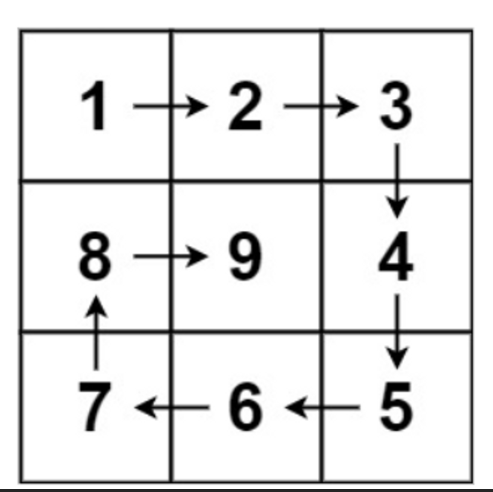
**Input:** n = 3

**Output:** [[1,2,3],[8,9,4],[7,6,5]]
    

In [7]:
class Solution:
    def generateMatrix(self, n: int) -> List[List[int]]:
        A = [[n * n]]
        while A[0][0] > 1:
            A = [list(range(A[0][0] - len(A), A[0][0]))] + list(zip(*A[::-1]))
        return A * (n > 0)


solution = Solution()

n = 3
print(solution.generateMatrix(n))

[[1, 2, 3], (8, 9, 4), (7, 6, 5)]


**Question 8**

Given two [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix) mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.

**Example 1:**
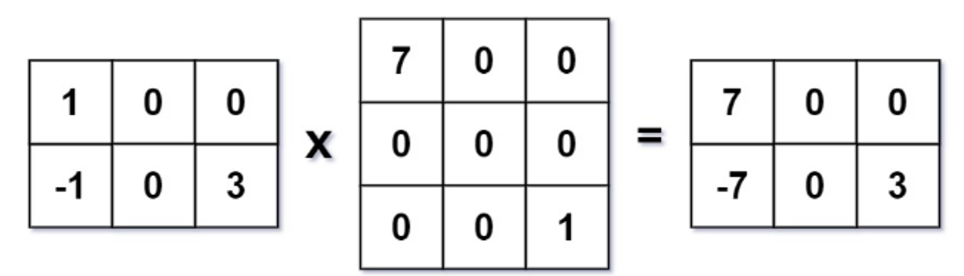
**Input:** mat1 = [[1,0,0],[-1,0,3]], mat2 = [[7,0,0],[0,0,0],[0,0,1]]

**Output:**

[[7,0,0],[-7,0,3]]

In [8]:
class Solution:
    def multiply(self, mat1: List[List[int]], mat2: List[List[int]]) -> List[List[int]]:
        r1, c1, c2 = len(mat1), len(mat1[0]), len(mat2[0])
        res = [[0] * c2 for _ in range(r1)]
        for i in range(r1):
            for j in range(c2):
                for k in range(c1):
                    res[i][j] += mat1[i][k] * mat2[k][j]
        return res
    
    
solution = Solution()

mat1 = [[1,0,0],[-1,0,3]]
mat2 = [[7,0,0],[0,0,0],[0,0,1]]
print(solution.multiply(mat1, mat2))

[[7, 0, 0], [-7, 0, 3]]
